In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/ushape.csv")

In [ ]:
df.head()

,X,Y,class
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8300,-0.5390,1.0


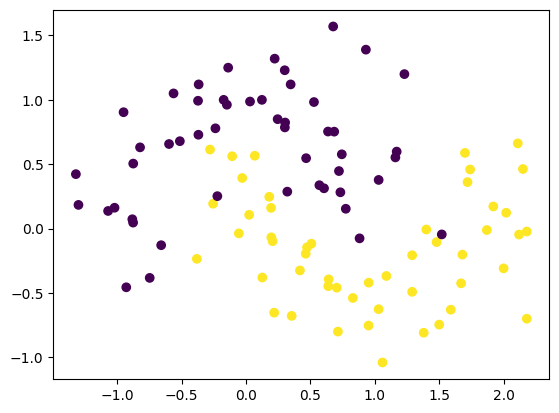

In [ ]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [ ]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(10,activation = 'relu', input_dim = 2, kernel_initializer = 'he_normal'))
model.add(Dense(10,activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(10,activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(10,activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(1,activation = 'sigmoid'))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
initial_weights = model.get_weights()

In [ ]:
initial_weights

[array([[ 0.30711696,  0.20988482, -0.8582244 , -0.91338676, -0.28639635,
          0.4126046 ,  0.4681182 , -0.20600408,  1.1601539 ,  0.463562  ],
        [ 0.38938347, -0.67244214,  0.3251929 ,  0.14606115,  0.68334347,
         -1.1203492 , -1.4829204 , -1.4118407 ,  0.56095034, -0.11685809]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.6929852 ,  0.25381443,  0.32537043,  0.08461145, -0.45673338,
          0.7635966 ,  0.24428038,  0.56571835, -0.46772307, -0.40444255],
        [-0.6171872 ,  0.96788675,  0.50573343, -0.26962844,  0.59353054,
         -0.33966884,  0.5334084 ,  0.2891067 , -0.45823517, -0.37304485],
        [ 0.7627668 ,  0.09179501,  0.7936458 , -0.11063807, -0.15559453,
          0.01575519,  0.3636294 , -0.16254957, -0.14930323,  0.15144865],
        [-0.5449696 , -0.88670486, -0.5399614 ,  0.7914331 , -0.821931  ,
         -0.44465518, -0.5952291 ,  0.33085647,  0.5626477 , -0.4883043 ],
        [ 0.34213

In [ ]:
initial_weights[0] = np.random.randn(2,10) * np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10) * np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10) * np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10) * np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1) * np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)


In [ ]:
model.set_weights(initial_weights)

In [ ]:
model.get_weights()

[array([[ 1.1439352 , -0.26126865,  0.5175914 , -0.7070707 ,  0.7324837 ,
         -0.3765529 ,  0.06230009,  0.25823504,  0.65762734, -0.13453682],
        [ 0.5634721 , -0.65507233,  0.67560476,  0.5971027 ,  0.40309665,
          1.1455735 ,  0.80203265,  0.8906318 , -0.23156676, -0.29554158]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.21609478, -0.46196917, -0.49756548, -0.18595055,  0.10604944,
         -0.3403269 , -0.12133195, -0.11089728,  0.05791514,  0.19558236],
        [ 0.05074552, -0.00854693,  0.59472805, -0.63014746, -0.36926693,
          0.1324287 ,  0.351162  ,  0.40971157,  0.4126616 ,  0.31469005],
        [ 0.28879738,  0.15247053,  0.6041732 ,  0.24726303,  0.13701184,
         -0.18918292,  0.00369349,  0.37476584, -0.3468159 ,  0.07502634],
        [-0.32097027,  0.05018533,  0.35879296, -0.27722725,  0.36943364,
         -0.07859729, -0.10397564, -0.32429564,  0.02198415,  0.3601227 ],
        [-0.21435

In [ ]:
model.compile(loss='binary_crossentropy', optimizer = "adam", metrics=['accuracy'])

In [ ]:
history = model.fit(X,y, epochs = 100, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step - accuracy: 0.4969 - loss: 0.6914 - val_accuracy: 0.5500 - val_loss: 0.6886
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6461 - loss: 0.6874 - val_accuracy: 0.6000 - val_loss: 0.6856
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6656 - loss: 0.6876 - val_accuracy: 0.6500 - val_loss: 0.6820
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7156 - loss: 0.6831 - val_accuracy: 0.7500 - val_loss: 0.6778
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7453 - loss: 0.6809 - val_accuracy: 0.8000 - val_loss: 0.6737
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7398 - loss: 0.6777 - val_accuracy: 0.8000 - val_loss: 0.6691
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7727 - loss: 0.6742 - val_accuracy: 0.8500 - val_loss: 0.6643
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8227 - loss: 0.6704 - val_accuracy: 0.8500 - val_loss

In [ ]:
model.get_weights()

[array([[ 1.091609  , -0.39737153,  0.6054323 , -0.9181725 ,  0.8505572 ,
         -0.35463846,  0.0864108 ,  0.31323934,  0.7929291 ,  0.00582364],
        [ 0.6510859 , -0.45794412,  0.45763412,  0.6695013 ,  0.18999438,
          1.3249416 ,  0.9757923 ,  1.0417421 , -0.48972216, -0.38819218]],
       dtype=float32),
 array([-0.15916502, -0.10676179,  0.05570976, -0.03798425,  0.16636898,
         0.15161557,  0.14431018,  0.01426914,  0.11790033,  0.01206482],
       dtype=float32),
 array([[ 0.1637569 , -0.4539913 , -0.59018373, -0.08628651,  0.09575389,
         -0.14819737,  0.0547718 , -0.07028408,  0.20913488,  0.15176263],
        [ 0.01206306, -0.08790081,  0.67366517, -0.4114311 , -0.15907326,
          0.35650694,  0.45820102,  0.35768896,  0.40572587,  0.5050216 ],
        [ 0.2391984 ,  0.15247053,  0.56049645,  0.2977032 ,  0.17345083,
         -0.01388221,  0.1729927 ,  0.3514981 , -0.24195695,  0.03668591],
        [-0.32097027, -0.03093026,  0.3865044 , -0.23724307, 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


<Axes: >

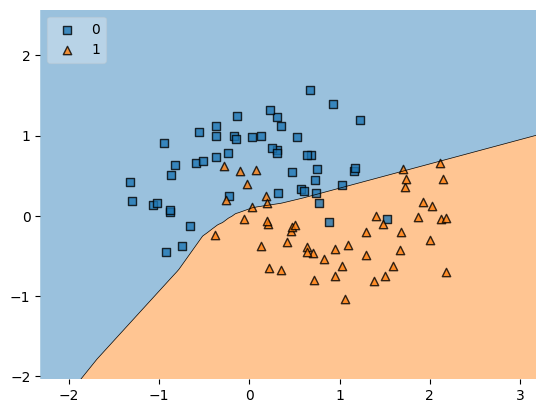

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)